# **What are the most demanded skills for the top 3 most popular data roles?**

**Methodology**
1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

**Original Exploration**

[13_Matplotlib_Format_Charts.ipynb](https://github.com/adinramaadin/Python_Project-2_Data-Job-Market/blob/main/Exploring_the_Data/12_Matplotlib_Fromat_Charts.ipynb)

### **Import Libraries and Data**

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt  
from matplotlib.colors import LinearSegmentedColormap

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### **Filter Data for the AANZFTA Countries**
Filter the data for the market of the United States.

In [2]:
# List of ASEAN countries
asean_countries = [
    'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 
    'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'
]

# Oceanic countries in the AANZFTA
oceanic_countries = [
    'Australia', 'New Zealand'
]

# Combined list for AANZFTA
aanzfta_countries = asean_countries + oceanic_countries


df_AANZFTA = df[df['job_country'].isin(aanzfta_countries)]

### **Explode Skills**

In [3]:
df_skills = df_AANZFTA.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
25,"Senior Officer, Data Analyst, GTO",sql
44,Binance Accelerator Program - Data Scientist (...,python
44,Binance Accelerator Program - Data Scientist (...,java
44,Binance Accelerator Program - Data Scientist (...,scala
47,Senior Data Engineering,sql
...,...,...
785736,DevOps Engineer,kubernetes
785736,DevOps Engineer,docker
785736,DevOps Engineer,ansible
785738,Commercial Analyst - Start Now,powerpoint


### **Count Skills per Job Title**

In [4]:
# Group by job_skills and job_title_short and count the number of occurrences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Name the count column as count
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1451,sql,Data Engineer,9948
1148,python,Data Engineer,8763
1450,sql,Data Analyst,8379
413,excel,Data Analyst,6700
1147,python,Data Analyst,5911
...,...,...,...
602,heroku,Business Analyst,1
604,heroku,Senior Data Analyst,1
1246,rshiny,Data Engineer,1
1244,rocketchat,Software Engineer,1


### **Create List of Top 3 Roles**

In [5]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

### **Plot Skill Counts**

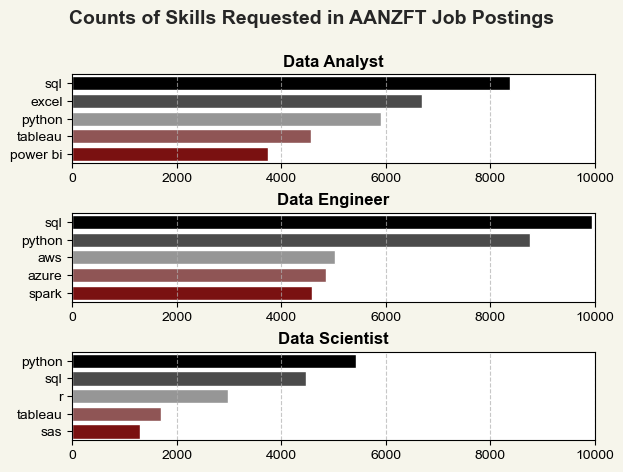

In [6]:
fig, ax = plt.subplots(len(job_titles), 1)

# Set plot style and palette
sns.set_theme(style='whitegrid')
sns.set_palette('muted')

# Custom color palette 
custom_palette = LinearSegmentedColormap.from_list(
    "RedGreyBlack", ["#8B0000", "#A9A9A9", "#000000"], N=10 
)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    custom_palette_list = custom_palette(np.linspace(0, 1, len(df_plot)))
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette=list(custom_palette_list))
    ax[i].set_title(job_title, weight='bold')
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].grid(axis='x', linestyle='--', alpha=0.7)
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 10000) # make the scales the same
    

plt.gcf().set_facecolor('#F6F5EB')
plt.rcParams['axes.facecolor'] = '#F6F5EB'
fig.suptitle('Counts of Skills Requested in AANZFT Job Postings', fontsize=14, weight='bold')
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

## **Convert Counts to Percentages**

In [7]:
# Use original df to get the count of job titles
df_job_title_count = df_AANZFTA['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,18446
1,Data Engineer,16868
2,Data Scientist,9607
3,Business Analyst,6997
4,Software Engineer,5779
5,Senior Data Engineer,3801
6,Senior Data Analyst,2913
7,Senior Data Scientist,1986
8,Cloud Engineer,1727
9,Machine Learning Engineer,1722


In [8]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,9948,16868,58.975575
1,python,Data Engineer,8763,16868,51.950439
2,sql,Data Analyst,8379,18446,45.424482
3,excel,Data Analyst,6700,18446,36.322238
4,python,Data Analyst,5911,18446,32.044888
...,...,...,...,...,...
1785,heroku,Business Analyst,1,6997,0.014292
1786,heroku,Senior Data Analyst,1,2913,0.034329
1787,rshiny,Data Engineer,1,16868,0.005928
1788,rocketchat,Software Engineer,1,5779,0.017304


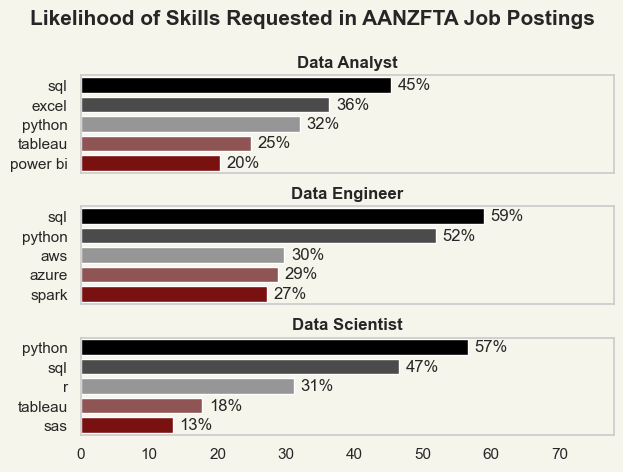

In [10]:
fig, ax = plt.subplots(len(job_titles), 1)


# Set plot style and palette
sns.set_theme(style='whitegrid')
sns.set_palette('muted')

# Custom color palette 
custom_palette = LinearSegmentedColormap.from_list(
    "RedGreyBlack", ["#8B0000", "#A9A9A9", "#000000"], N=10 
)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette=list(custom_palette_list))
    ax[i].set_title(job_title, weight='bold')
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].grid(False)  # Both x and y gridlines will show up
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

plt.gcf().set_facecolor('#F6F5EB')
plt.rcParams['axes.facecolor'] = '#F6F5EB'
fig.suptitle('Likelihood of Skills Requested in AANZFTA Job Postings', fontsize=15, weight='bold')
plt.subplots_adjust(hspace=0.4)  # Add spacing between subplots

fig.tight_layout(h_pad=.8)
plt.show()